choose learning rate using lrfind, which implements cyclical learning rate paper (L Smith 2017). The finder starts with a small learning rate and doubles it each time. The idea is to plot learning rate (lrsched plot) against loss and pick a rate where loss is decreasing but before turning point where it all goes bad (because learning rate has been increased to much and is blowing up)

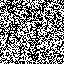

In [43]:
# turn array into image:

from PIL import Image
from IPython.display import display

import random
data = [random.randint(0, 1) for i in range(64 * 64)]

img = Image.new('1', (64, 64))
img.putdata(data)
# img.save('my.png')

display(img)

In [44]:
data

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [2]:
from controller.game import GameController
from view.consolegui import ConsoleGui
from model.aiplayer import AiPlayer
from model.bag import Bag
from model.config import Direction
from model.row import Row
import numpy as np
from model.config import LETTER_VALUES, NO_CROSS_WORD, RACK_SIZE, BONUS

In [3]:
players = [None, None]
bag = Bag()
game = GameController(players, bag)
gui = ConsoleGui(game)
player1 = AiPlayer(game, gui, "AI Player 1")
player2 = AiPlayer(game, gui, "AI Player 2")
game.players = [player1, player2]
game.active_player = player2
board = game.board
lex = game.lexicon
validator = game.validator
board

GameBoard object:
     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - . . . ' . ' . . . - . . |
 4 | ' . . - . . . ' . . . - . . ' |
 5 | . . . . - . . . . . - . . . . |
 6 | . " . . . " . . . " . . . " . |
 7 | . . ' . . . ' . ' . . . ' . . |
 8 | = . . ' . . . - . . . ' . . = |
 9 | . . ' . . . ' . ' . . . ' . . |
10 | . " . . . " . . . " . . . " . |
11 | . . . . - . . . . . - . . . . |
12 | . . . - . . . ' . . . - . . . |
13 | ' . - . . . ' . ' . . . - . ' |
14 | . - . . . " . . . " . . . - . |
15 | = . . ' . . . = . . . ' . . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O

In [4]:
game.start_game()

Waiting for players
Starting game
Score: [AI Player 2: 0][AI Player 1: 0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - . . . ' . ' . . . - . . |
 4 | ' . . - . . . ' . . . - . . ' |
 5 | . . . . - . . . . . - . . . . |
 6 | . " . . . " . . . " . . . " . |
 7 | . . ' . . . ' . ' . . . ' . . |
 8 | = . . ' . . . - . . . ' . . = |
 9 | . . ' . . . ' . ' . . . ' . . |
10 | . " . . . " . . . " . . . " . |
11 | . . . . - . . . . . - . . . . |
12 | . . . - . . . ' . . . - . . . |
13 | ' . - . . . ' . ' . . . - . ' |
14 | . - . . . " . . . " . . . - . |
15 | = . . ' . . . = . . . ' . . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: PDSRANN

Score: [AI Player 2: 0][AI Player 1: 0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - .

Score: [AI Player 2: 69.0][AI Player 1: 80.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - . . . ' . ' . . . - . . |
 4 | ' . . - . . . ' . . . - . . ' |
 5 | . . . . J A G . . . - . . . . |
 6 | E X E s . " R I N K . . . " . |
 7 | . . A U L O I . ' . . . ' . . |
 8 | = . . P A N D S . . . ' . . = |
 9 | . . ' . V E S T ' . . . ' . . |
10 | . " . . . " . . . " . . . " . |
11 | . . . . - . . . . . - . . . . |
12 | . . . - . . . ' . . . - . . . |
13 | ' . - . . . ' . ' . . . - . ' |
14 | . - . . . " . . . " . . . - . |
15 | = . . ' . . . = . . . ' . . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: RRLNORI

Score: [AI Player 2: 69.0][AI Player 1: 80.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - . . . ' . ' . . . - . .

Score: [AI Player 2: 128.0][AI Player 1: 173.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . H . . . " . . . - . |
 3 | . . - . . I ' . ' . . . - . . |
 4 | ' F L Y . L . ' . . . - . . ' |
 5 | N O . . J A G . . . - . . . . |
 6 | E X E s . " R I N K . . . " . |
 7 | T . A U L O I . ' . . . ' . . |
 8 | T . . P A N D S . . . ' . . = |
 9 | I . ' . V E S T ' . . . ' . . |
10 | E D . . . " . . . " . . . " . |
11 | . O . . - . . . . . - . . . . |
12 | . B . - . . . ' . . . - . . . |
13 | ' R - . . . ' . ' . . . - . ' |
14 | Z O . . . " . . . " . . . - . |
15 | A . . ' . . . = . . . ' . . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: RRIALDI

Score: [AI Player 2: 128.0][AI Player 1: 173.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . H . . . " . . . - . |
 3 | . . - . . I ' . ' . . . -

Score: [AI Player 2: 192.0][AI Player 1: 243.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . H . H O " . . . - . |
 3 | . . - . . I ' O W . A . - . . |
 4 | ' F L Y . L . N E . I - . . ' |
 5 | N O . . J A G G . . A . . . . |
 6 | E X E s . " R I N K S . . " . |
 7 | T . A U L O I . ' . . . ' . . |
 8 | T . . P A N D S . . . ' . . = |
 9 | I . ' . V E S T ' . . . ' . . |
10 | E D . A . " . . . " . . . " . |
11 | R O R I D . . . . . - . . . . |
12 | . B E N . . . ' . . . - . . . |
13 | ' R E E . . ' . ' . . . - . ' |
14 | Z O L . . " . . . " . . . - . |
15 | A . . ' . . . = . . . ' . . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: OIUNVMU

Score: [AI Player 2: 192.0][AI Player 1: 243.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . ' . . = |
 2 | . - . . . H . H O " . . . - . |
 3 | . . - . . I ' O W . A . -

Score: [AI Player 2: 279.0][AI Player 1: 315.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . I V I E s |
 2 | Q A T . . H . H O B . I . M . |
 3 | . . E M . I ' O W . A N - P . |
 4 | ' F L Y . L . N E . I O . T ' |
 5 | N O . . J A G G . . A . . Y O |
 6 | E X E s . " R I N K S . . " R |
 7 | T . A U L O I . ' . . . ' . D |
 8 | T . . P A N D S . . . ' . . U |
 9 | I . ' . V E S T ' . . . ' . R |
10 | E D . A . " . . . " . . . " E |
11 | R O R I D . . . . . - . . . . |
12 | . B E N . . . ' . . . - . . . |
13 | ' R E E . . ' . ' . . . - . ' |
14 | Z O L . . " . . . " . . . - . |
15 | A . . ' . . . = . . . ' . . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 1 rack: UTCEFGW

Score: [AI Player 2: 279.0][AI Player 1: 315.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . I V I E s |
 2 | Q A T . . H . H O B . I . M . |
 3 | . . E M . I ' O W . A N -

In [21]:
board

GameBoard object:
     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . I V I E s |
 2 | Q A T . C H . H O B . I . M . |
 3 | . . E M . I ' O W . A N - P . |
 4 | ' F L Y . L . N E . I O . T ' |
 5 | N O . . J A G G . . A . . Y O |
 6 | E X E s . " R I N K S . . " R |
 7 | T . A U L O I . ' . . . C U D |
 8 | T . . P A N D S . . . ' . G U |
 9 | I . ' . V E S T ' . . . ' . R |
10 | E D . A . " . . . " . . . W E |
11 | R O R I D . . . . . - . . E . |
12 | . B E N . . . ' . . . - . F . |
13 | ' R E E . . ' . ' . . . - T ' |
14 | Z O L . . " . . . " . . A S . |
15 | A . . ' . . . = . . . ' . . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O

In [22]:
arr = board.existing_letters[1:-1].T[1:-1] # slice off sentinels
arr

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9, 22,  9,  5, 51],
       [17,  1, 20,  0,  3,  8,  0,  8, 15,  2,  0,  9,  0, 13,  0],
       [ 0,  0,  5, 13,  0,  9,  0, 15, 23,  0,  1, 14,  0, 16,  0],
       [ 0,  6, 12, 25,  0, 12,  0, 14,  5,  0,  9, 15,  0, 20,  0],
       [14, 15,  0,  0, 10,  1,  7,  7,  0,  0,  1,  0,  0, 25, 15],
       [ 5, 24,  5, 51,  0,  0, 18,  9, 14, 11, 19,  0,  0,  0, 18],
       [20,  0,  1, 21, 12, 15,  9,  0,  0,  0,  0,  0,  3, 21,  4],
       [20,  0,  0, 16,  1, 14,  4, 19,  0,  0,  0,  0,  0,  7, 21],
       [ 9,  0,  0,  0, 22,  5, 19, 20,  0,  0,  0,  0,  0,  0, 18],
       [ 5,  4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, 23,  5],
       [18, 15, 18,  9,  4,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  2,  5, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0, 18,  5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [26, 15, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19,  0],
       [ 1,  0,  0,  0,  0,  0,  0

In [37]:
ord('S')-ord('s')

-32

In [38]:
# change blanks to normal:
arr2 = arr + (arr>26).astype(int)*-32
arr2

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9, 22,  9,  5, 19],
       [17,  1, 20,  0,  3,  8,  0,  8, 15,  2,  0,  9,  0, 13,  0],
       [ 0,  0,  5, 13,  0,  9,  0, 15, 23,  0,  1, 14,  0, 16,  0],
       [ 0,  6, 12, 25,  0, 12,  0, 14,  5,  0,  9, 15,  0, 20,  0],
       [14, 15,  0,  0, 10,  1,  7,  7,  0,  0,  1,  0,  0, 25, 15],
       [ 5, 24,  5, 19,  0,  0, 18,  9, 14, 11, 19,  0,  0,  0, 18],
       [20,  0,  1, 21, 12, 15,  9,  0,  0,  0,  0,  0,  3, 21,  4],
       [20,  0,  0, 16,  1, 14,  4, 19,  0,  0,  0,  0,  0,  7, 21],
       [ 9,  0,  0,  0, 22,  5, 19, 20,  0,  0,  0,  0,  0,  0, 18],
       [ 5,  4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, 23,  5],
       [18, 15, 18,  9,  4,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  2,  5, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0, 18,  5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [26, 15, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19,  0],
       [ 1,  0,  0,  0,  0,  0,  0

In [48]:
arr2 = arr2*9

In [53]:
arr2

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 198,  81,
         45, 171],
       [153,   9, 180,   0,  27,  72,   0,  72, 135,  18,   0,  81,   0,
        117,   0],
       [  0,   0,  45, 117,   0,  81,   0, 135, 207,   0,   9, 126,   0,
        144,   0],
       [  0,  54, 108, 225,   0, 108,   0, 126,  45,   0,  81, 135,   0,
        180,   0],
       [126, 135,   0,   0,  90,   9,  63,  63,   0,   0,   9,   0,   0,
        225, 135],
       [ 45, 216,  45, 171,   0,   0, 162,  81, 126,  99, 171,   0,   0,
          0, 162],
       [180,   0,   9, 189, 108, 135,  81,   0,   0,   0,   0,   0,  27,
        189,  36],
       [180,   0,   0, 144,   9, 126,  36, 171,   0,   0,   0,   0,   0,
         63, 189],
       [ 81,   0,   0,   0, 198,  45, 171, 180,   0,   0,   0,   0,   0,
          0, 162],
       [ 45,  36,   0,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        207,  45],
       [162, 135, 162,  81,  36,   0,   0,   0,   0,   0,   0,   0,   0,
       

In [84]:
arr2.flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 198,  81,
        45, 171, 153,   9, 180,   0,  27,  72,   0,  72, 135,  18,   0,
        81,   0, 117,   0,   0,   0,  45, 117,   0,  81,   0, 135, 207,
         0,   9, 126,   0, 144,   0,   0,  54, 108, 225,   0, 108,   0,
       126,  45,   0,  81, 135,   0, 180,   0, 126, 135,   0,   0,  90,
         9,  63,  63,   0,   0,   9,   0,   0, 225, 135,  45, 216,  45,
       171,   0,   0, 162,  81, 126,  99, 171,   0,   0,   0, 162, 180,
         0,   9, 189, 108, 135,  81,   0,   0,   0,   0,   0,  27, 189,
        36, 180,   0,   0, 144,   9, 126,  36, 171,   0,   0,   0,   0,
         0,  63, 189,  81,   0,   0,   0, 198,  45, 171, 180,   0,   0,
         0,   0,   0,   0, 162,  45,  36,   0,   9,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 207,  45, 162, 135, 162,  81,  36,   0,
         0,   0,   0,   0,   0,   0,   0,  45,   0,   0,  18,  45, 126,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  54,   0,   

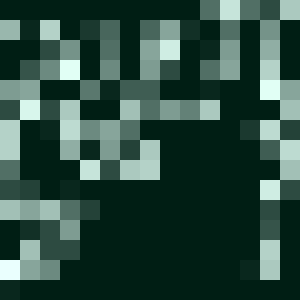

In [98]:
arr4 = [(a,a+30,a+20) for a in arr2.flatten()]
img = Image.new('RGB', (15, 15))
img.putdata(arr4)
img = img.resize((300,300))
img.save('myboard.png')
display(img)

In [47]:
arr3 = np.repeat(arr2,5)

### 

In [85]:
im2 = Image.new('P', (15, 15))
im2.putdata(arr2.flatten())
im2.save('myboard.png')
display(im2)

In [86]:
arr2.flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 198,  81,
        45, 171, 153,   9, 180,   0,  27,  72,   0,  72, 135,  18,   0,
        81,   0, 117,   0,   0,   0,  45, 117,   0,  81,   0, 135, 207,
         0,   9, 126,   0, 144,   0,   0,  54, 108, 225,   0, 108,   0,
       126,  45,   0,  81, 135,   0, 180,   0, 126, 135,   0,   0,  90,
         9,  63,  63,   0,   0,   9,   0,   0, 225, 135,  45, 216,  45,
       171,   0,   0, 162,  81, 126,  99, 171,   0,   0,   0, 162, 180,
         0,   9, 189, 108, 135,  81,   0,   0,   0,   0,   0,  27, 189,
        36, 180,   0,   0, 144,   9, 126,  36, 171,   0,   0,   0,   0,
         0,  63, 189,  81,   0,   0,   0, 198,  45, 171, 180,   0,   0,
         0,   0,   0,   0, 162,  45,  36,   0,   9,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 207,  45, 162, 135, 162,  81,  36,   0,
         0,   0,   0,   0,   0,   0,   0,  45,   0,   0,  18,  45, 126,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  54,   0,   

In [87]:
imt = im2.transpose(Image.TRANSPOSE)
imt.save('transboard.png')
display(imt)

In [88]:
imt = imt.resize((300,300))

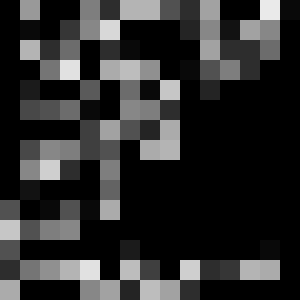

In [89]:
display(imt)

In [93]:
arr4 = [(a,a,a) for a in arr2.flatten()]

In [94]:
arr4


[(0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (81, 81, 81),
 (198, 198, 198),
 (81, 81, 81),
 (45, 45, 45),
 (171, 171, 171),
 (153, 153, 153),
 (9, 9, 9),
 (180, 180, 180),
 (0, 0, 0),
 (27, 27, 27),
 (72, 72, 72),
 (0, 0, 0),
 (72, 72, 72),
 (135, 135, 135),
 (18, 18, 18),
 (0, 0, 0),
 (81, 81, 81),
 (0, 0, 0),
 (117, 117, 117),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (45, 45, 45),
 (117, 117, 117),
 (0, 0, 0),
 (81, 81, 81),
 (0, 0, 0),
 (135, 135, 135),
 (207, 207, 207),
 (0, 0, 0),
 (9, 9, 9),
 (126, 126, 126),
 (0, 0, 0),
 (144, 144, 144),
 (0, 0, 0),
 (0, 0, 0),
 (54, 54, 54),
 (108, 108, 108),
 (225, 225, 225),
 (0, 0, 0),
 (108, 108, 108),
 (0, 0, 0),
 (126, 126, 126),
 (45, 45, 45),
 (0, 0, 0),
 (81, 81, 81),
 (135, 135, 135),
 (0, 0, 0),
 (180, 180, 180),
 (0, 0, 0),
 (126, 126, 126),
 (135, 135, 135),
 (0, 0, 0),
 (0, 0, 0),
 (90, 90, 90),
 (9, 9, 9),
 (63, 63, 63),
 (63, 63, 63),
 (0, 0, 0),
 (0, 0, 0)